<a href="https://colab.research.google.com/github/avynash/DesignOptimization2021Fall/blob/main/Project_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Gradient-based Algorithms and Differentiable Programming


## 1. Introduction
Consider a simple formulation of rocket landing where the rocket state $x(t)$ is represented by its distance to the ground $d(t)$ and its velocity $v(t)$, i.e., $x(t) = [d(t), v(t)]^T$, where $t$ specifies time. The control input of the rocket is its acceleration $a(t)$. The discrete-time dynamics follows 

$$
\begin{aligned}
d(t+1) = d(t) + v(t) \Delta t, \\
v(t+1) = v(t) + a(t) \Delta t,
\end{aligned}
$$

where $\Delta t$ is a time interval. Further, let the closed-loop controller be 

$$
a(t) = f_{\theta}(x(t))
$$

where $f_{\theta}(\cdot)$ is a neural network with parameters $\theta$, which are to be determined through optimization.

For each time step, we assign a loss as a function of the control input and the state: $l(x(t),a(t))$. In this example, we will simply set $l(x(t),a(t))=0$ for all $t=1,...,T-1$, where $T$ is the final time step, and $l(x(T),a(T)) = ||x(T)||^2 = d(T)^2 + v(T)^2$. This loss encourages the rocket to reach $d(T)=0$ and $v(T)=0$, which are proper landing conditions.

The optimization problem is now formulated as

$$
\begin{aligned}
\min_{\theta} \quad & ||x(T)||^2 \\
\quad & d(t+1) = d(t) + v(t) \Delta t, \\
\quad & v(t+1) = v(t) + a(t) \Delta t, \\
\quad & a(t) = f_{\theta}(x(t)), ~\forall t=1,...,T-1
\end{aligned}
$$

While this problem is constrained, it is easy to see that the objective function can be expressed as a function of $x(T-1) and a(T-1)$, where $x(T-1)$ as a function of $x(T-2)$ and $a(T-2)$, and so on. Thus it is essentially an unconstrained problem with respect to $\theta$. 

In the following, we code this problem up with [PyTorch](https://pytorch.org/), which allows us to only build the forward pass of the loss (i.e., how we move from $x(1)$ to $x(2)$ and all the way to $x(T)$) and automatically get the gradient $\nabla_{\theta} l(x(T),a(T))$.

---

## 2. Sample Code

Before you start, please make sure you install the PyTorch package in Python. If you are using Pycharm, you can do so through *setting*->*Project: Your Project Name*->*Project Interpreter*->*Install (the little plus sign to the right of the window)*. 

[1] loss: 9542647808.000


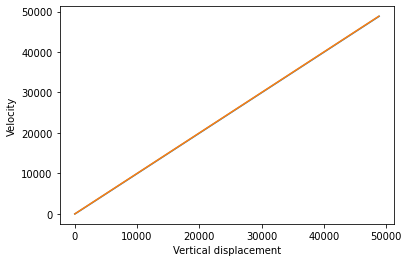

[2] loss: 5306834944.000
[3] loss: 2956584192.000
[4] loss: 1357520640.000
[5] loss: 326891840.000
[6] loss: 180117344.000
[7] loss: 121250312.000
[8] loss: 86785792.000
[9] loss: 57710840.000
[10] loss: 33599068.000
[11] loss: 19849602.000


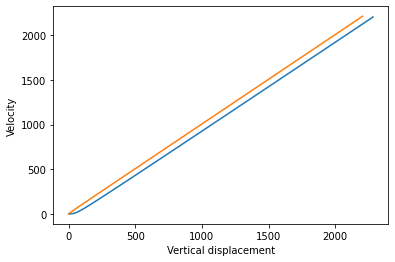

[12] loss: 12284664.000
[13] loss: 7999599.000
[14] loss: 5196545.000
[15] loss: 3261740.500
[16] loss: 1949849.500
[17] loss: 1160279.875
[18] loss: 703270.312
[19] loss: 436421.656
[20] loss: 276643.406
[21] loss: 181948.141


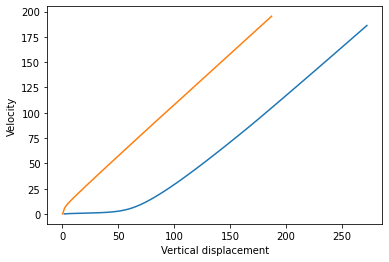

[22] loss: 123926.438
[23] loss: 83921.789
[24] loss: 60493.797
[25] loss: 43597.160
[26] loss: 32036.805
[27] loss: 24116.496
[28] loss: 18648.439
[29] loss: 14845.393
[30] loss: 12196.367
[31] loss: 10482.729


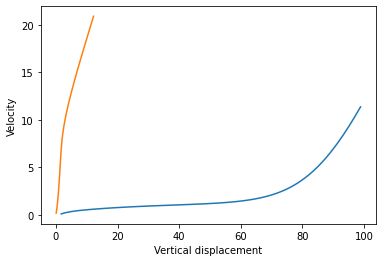

[32] loss: 9571.889
[33] loss: 9015.901
[34] loss: 8581.416
[35] loss: 8200.958
[36] loss: 7858.437
[37] loss: 7541.359
[38] loss: 7290.482
[39] loss: 7097.271
[40] loss: 6922.136
[41] loss: 6747.983


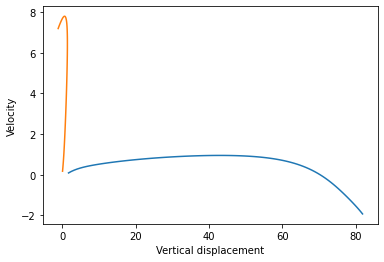

[42] loss: 6566.211
[43] loss: 6368.606
[44] loss: 6145.632
[45] loss: 5881.193
[46] loss: 5553.360
[47] loss: 5156.056
[48] loss: 4760.023
[49] loss: 4451.580
[50] loss: 4236.238
[51] loss: 4087.414


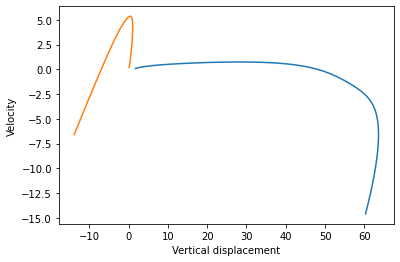

[52] loss: 3982.020
[53] loss: 3904.591
[54] loss: 3844.801
[55] loss: 3796.007
[56] loss: 3753.612
[57] loss: 3714.439
[58] loss: 3676.107
[59] loss: 3636.769
[60] loss: 3594.651
[61] loss: 3548.460


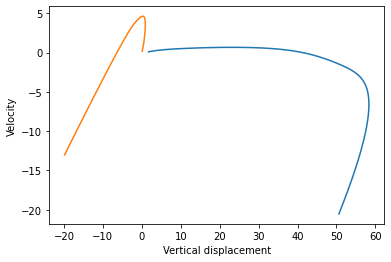

[62] loss: 3496.815
[63] loss: 3437.281
[64] loss: 3368.274
[65] loss: 3286.856
[66] loss: 3189.315
[67] loss: 3070.927
[68] loss: 2930.710
[69] loss: 2772.445
[70] loss: 2594.132
[71] loss: 2390.197


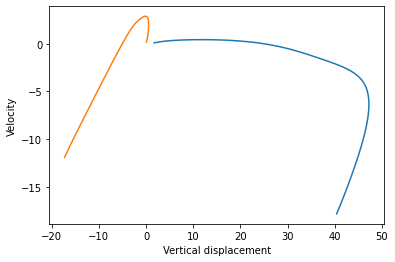

[72] loss: 2151.386
[73] loss: 1881.377
[74] loss: 1604.133
[75] loss: 1340.186
[76] loss: 1100.664
[77] loss: 881.550
[78] loss: 660.078
[79] loss: 411.701
[80] loss: 316.934
[81] loss: 241.295


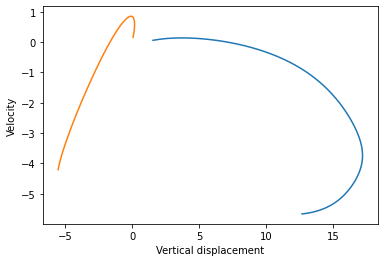

[82] loss: 188.110
[83] loss: 144.624
[84] loss: 87.485
[85] loss: 54.099
[86] loss: 36.745
[87] loss: 26.404
[88] loss: 19.630
[89] loss: 15.172
[90] loss: 12.211
[91] loss: 10.092


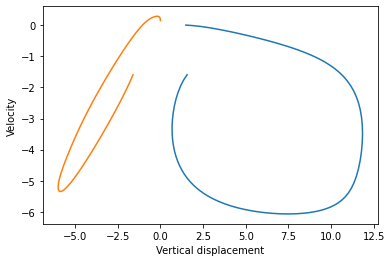

[92] loss: 8.437
[93] loss: 7.114
[94] loss: 6.018
[95] loss: 5.098
[96] loss: 4.308
[97] loss: 3.614
[98] loss: 2.999
[99] loss: 2.447
[100] loss: 1.955


In [ ]:
# overhead
import logging
import math
import random
import numpy as np
import time
import torch as t
import torch.nn as nn
from torch import optim
from torch.nn import utils
import matplotlib.pyplot as plt
logger = logging.getLogger(__name__)
FRAME_TIME = 0.1  # second, time interval
GRAVITY_ACCEL = 9.8  # m/s2, graviational force, g
BOOST_ACCEL = 15.0  # m/s2, thrust constant
class Dynamics(nn.Module):
    def __init__(self):
        super(Dynamics, self).__init__()
    @staticmethod
    def forward(state, action):
        """
        action:
        action[0]: y directional boost     
        action[1]: x directional boost  
        states:
        state[0] = y
        state[1] = vy 
        state[2] = x
        state[3] = vx 
        """   
        delta_state_gravity = t.tensor([0., GRAVITY_ACCEL * FRAME_TIME,0.,0])
        boosty = action[0]
        boostx = action[1]
        delta_state_y = BOOST_ACCEL * FRAME_TIME * t.tensor([0., -1.0,0.,0]) * boosty
        delta_state_x = BOOST_ACCEL * FRAME_TIME * t.tensor([1.,0.,0.,0]) * boostx
        state = state + delta_state_y + delta_state_x + delta_state_gravity
        step_mat = t.tensor([[1., FRAME_TIME,0.,0], [0., 1.,FRAME_TIME,0],[0., 1.,0., FRAME_TIME], [FRAME_TIME,0.,1.,0]])    
        state = t.matmul(step_mat, state)
        return state
class Controller(nn.Module):
    def __init__(self, dim_input, dim_hidden, dim_output):
        """
        dim_input: # of system states
        dim_output: # of actions
        dim_hidden: up to you
        """
        super(Controller, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(dim_input, dim_hidden),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.Sigmoid()
        )
    def forward(self, state):
        action = self.network(state)
        return action
class Simulation(nn.Module):
    def __init__(self, controller, dynamics, T):
        super(Simulation, self).__init__()
        self.state = self.initialize_state()
        self.controller = controller
        self.dynamics = dynamics
        self.T = T
        self.action_trajectory = []
        self.state_trajectory = []
    def forward(self, state):
        self.action_trajectory = []
        self.state_trajectory = []
        for _ in range(T):
            action = self.controller.forward(state)
            state = self.dynamics.forward(state, action)
            self.action_trajectory.append(action)
            self.state_trajectory.append(state)
        return self.error(state)
    @staticmethod
    def initialize_state():
        state = [1., 0.,0.,0]  
        return t.tensor(state, requires_grad=False).float()
    def error(self, state):
        return state[0]**2 + state[1]**2 + state[2]**2 + state[3]**2
class Optimize:
    def __init__(self, simulation):
        self.simulation = simulation
        self.parameters = simulation.controller.parameters()
        self.optimizer = optim.LBFGS(self.parameters, lr=0.008)
    def step(self):
        def closure():
            loss = self.simulation(self.simulation.state)
            self.optimizer.zero_grad()
            loss.backward()
            return loss
        self.optimizer.step(closure)
        return closure()
    def train(self, epochs):
        for epoch in range(epochs):
            loss = self.step()
            print('[%d] loss: %.3f' % (epoch + 1, loss))
            if epoch % 10 == 0:
                self.visualize()
    def visualize(self):
        data = np.array([self.simulation.state_trajectory[i].detach().numpy() for i in range(self.simulation.T)])
        y1 = data[:, 0]
        vy = data[:, 1]
        x1 = data[:, 2]
        vx = data[:, 3]
        plt.plot(y1, vy)
        plt.plot(x1,vx)
        plt.xlabel('Vertical displacement')
        plt.ylabel('Velocity')
        plt.show()
T = 100  # number of time steps
dim_input = 4  # state space dimensions
dim_hidden = 6  # latent dimensions
dim_output = 4  # action space dimensions
d = Dynamics()  # define dynamics
c = Controller(dim_input, dim_hidden, dim_output)  # define controller
s = Simulation(c, d, T)  # define simulation
o = Optimize(s)  # define optimizer
o.train(100)  # solve the optimization problem

## 3. A Better Problem Formulation

Here is a list of things we discussed during the class that could help to make the problem more representative of the reality:

1. More realistic definition of state and action spaces: Rocket orientation, angular velocity, etc. 
2. Better dynamical model, e.g., drag
3. Constraints in state and action spaces
4. Controller design for a distribution of initial states rather than one
5. Randomness in dynamics, sensing, etc.
6. Discontinuity in modeling so that gradient cannot be computed, e.g., mechanical failures.

In this project, please choose at least one aspect from 1 to 5 from the list to improve your problem formulation and solve the resultant problem. We will address 6 when we talk about reinforcement learning.

Here is one example of problem formulation when we consider randomness in dynamics and initial states:

$$
\begin{aligned}
\min_{\theta} \quad & \mathbb{E}_{\{w(t), u(t), x(0)\}}\left[||x(T)||^2\right] \\
\quad & d(t+1) = d(t) + v(t) + w(t) \Delta t, \\
\quad & v(t+1) = v(t) + a(t) + u(t) \Delta t, \\
\quad & a(t) = f_{\theta}(x(t)), ~\forall t=1,...,T-1 \\
\quad & x(1) \sim \Pr(x(1))
\end{aligned}
$$

Here $w(t) \sim \Pr(w(t))$ and $u(t) \sim \Pr(u(t))$ are modeled as i.i.d. noises added to the dynamics, and $\Pr(x(1))$ is the distribution of initial states. We will approximate this problem using samples from $\Pr(w(t))$, $\Pr(u(t))$, and $\Pr(x(1))$. To do so, we sample $\{w(1)^{(i)},w(2)^{(i)},...,w(T)^{(i)}\}_{i}^N$ from $\Pr(w(t))$,  $\{u(1)^{(i)},u(2)^{(i)},...,u(T)^{(i)}\}_{i}^N$ from $\Pr(u(t))$, and $\{x(0)^{(i)}\}_{i}^N$ from $\Pr(x(1))$, where $N$ is the number of samples to be considered. Then we have the following problem instead:

$$
\begin{aligned}
\min_{\theta} \quad & \frac{1}{N}\sum_{i=1}^N ||x^{(i)}(T)||^2 \\
\quad & d(t+1)^{(i)} = d(t)^{(i)} + v(t)^{(i)} + w(t)^{(i)} \Delta t, \\
\quad & v(t+1)^{(i)} = v(t)^{(i)} + a(t)^{(i)} + u(t)^{(i)} \Delta t, \\
\quad & a(t)^{(i)} = f_{\theta}(x(t)^{(i)}), ~\forall t=1,...,T-1, ~i=1,...,N \\
\end{aligned}
$$

The code up this new problem, you will fully utilize the tensor operations in PyTorch. For example, the state tensor "x" will now become a N-by-2 matrix, where the first dimension represents the number of trajectories to be optimized. 

Problem Statement:

The scenario that we are working on is a Rocket Landing. The different types of data that we can observe are:

The position of the rocket in y-direction is y1

The velocity of the rocket: $v_y $

The gravitational force, g = 9.8 m/s

The acceleration/thrust that is produced is takes as 15m/s

The frame time for the problem is taken 0.1


The calculation for the states is done by applying gravity to the problem and then defining the action that we are about to apply in the whole space and on the rocket.

Then for each action, the state is defined.

Then a controller setup is created and the simulation is done using the optimizer and then graphs are used to observe the convergence of the problem.

